<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/da15_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame에서 날짜/시간(datetime) 타입 데이터 다루기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SPX 데이터셋

In [2]:
file_path = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/examples/spx.csv'

In [3]:
spx = pd.read_csv(file_path)

In [4]:
spx.head()

,Date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75


In [5]:
spx.tail()

,Date,SPX
5467,2011-10-10 00:00:00,1194.89
5468,2011-10-11 00:00:00,1195.54
5469,2011-10-12 00:00:00,1207.25
5470,2011-10-13 00:00:00,1203.66
5471,2011-10-14 00:00:00,1224.58


In [6]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5472 non-null   object 
 1   SPX     5472 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.6+ KB


## 문자열 타입의 컬럼을 날짜/시간(datetime) 타입으로 변환

In [7]:
spx['Date'] = pd.to_datetime(spx['Date'])  # pd.to_datetime(spx['Date'], format='%Y-%m-%d %H:%M:%S')

In [8]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [9]:
spx.head()

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


## CSV 파일에서 DataFrame을 생성할 때 날짜/시간 컬럼을 지정

In [16]:
# spx = pd.read_csv(file_path, parse_dates=['Date'])
# spx = pd.read_csv(file_path, parse_dates=['Date'], date_format='%Y-%m-%d %H:%M:%S')
spx = pd.read_csv(file_path, parse_dates=['Date'],
                  date_format={'Date': '%Y-%m-%d %H:%M:%S'})

In [17]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [18]:
spx.head()

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


## 기간별(연도별/분기별/월별) 통계

In [19]:
# Date 컬럼 -> Index(row label)로 변환
spx_with_index = spx.set_index('Date')

In [20]:
spx_with_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


In [21]:
spx_with_index.head()  #> DatetimeIndex를 갖는 DataFrame

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [23]:
# 연도별 SPX의 평균
by_year = spx_with_index.resample('Y').mean()

In [24]:
by_year.head()

,SPX
Date,
1990-12-31,334.123506
1991-12-31,376.186324
1992-12-31,415.747008
1993-12-31,451.614822
1994-12-31,460.416508


In [25]:
by_year.tail()

,SPX
Date,
2007-12-31,1477.184343
2008-12-31,1220.042055
2009-12-31,948.046389
2010-12-31,1139.965516
2011-12-31,1276.093015


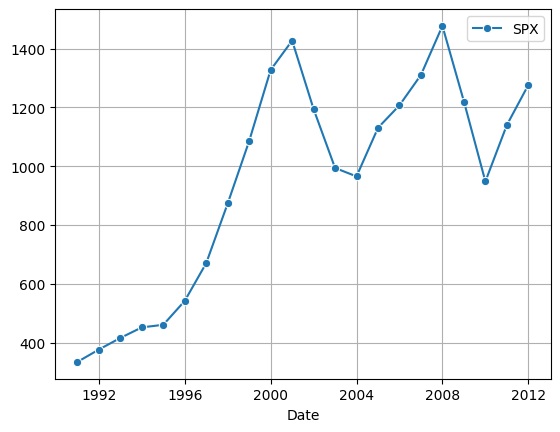

In [27]:
sns.lineplot(data=by_year, marker='o')
plt.grid()
plt.show()

In [29]:
# 분기별 SPX의 평균
by_quarter = spx_with_index.resample('Q').mean()

In [30]:
by_quarter.head()

,SPX
Date,
1990-03-31,334.751951
1990-06-30,349.796508
1990-09-30,335.881746
1990-12-31,316.562031
1991-03-31,352.282951


In [31]:
by_quarter.tail()

,SPX
Date,
2010-12-31,1204.585625
2011-03-31,1302.529032
2011-06-30,1318.332857
2011-09-30,1225.268438
2011-12-31,1171.356000


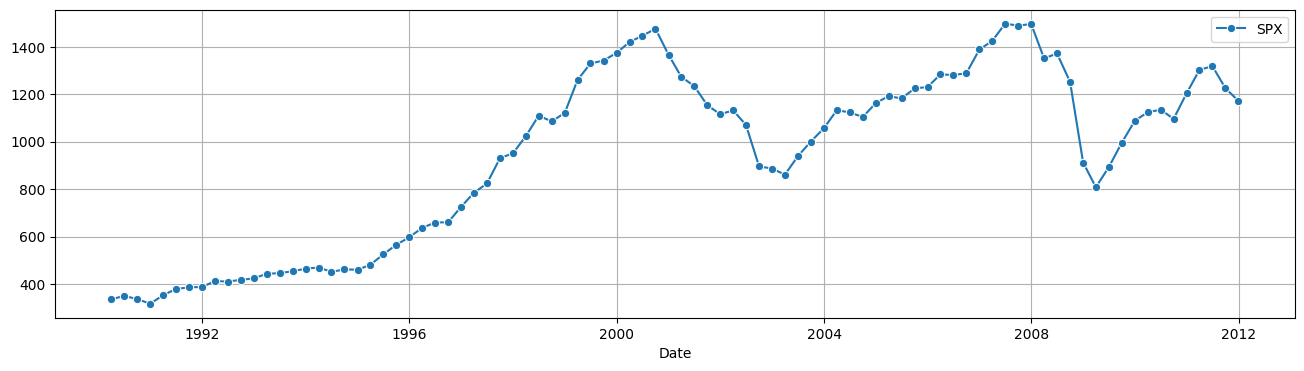

In [35]:
fig = plt.figure(figsize=(16, 4))
sns.lineplot(data=by_quarter, marker='o')
plt.grid()
plt.show()

In [36]:
# 월별 SPX 평균
by_month = spx_with_index.resample('M').mean()

In [37]:
by_month.head()

,SPX
Date,
1990-02-28,330.452632
1990-03-31,338.465000
1990-04-30,338.178000
1990-05-31,350.250000
1990-06-30,360.386667


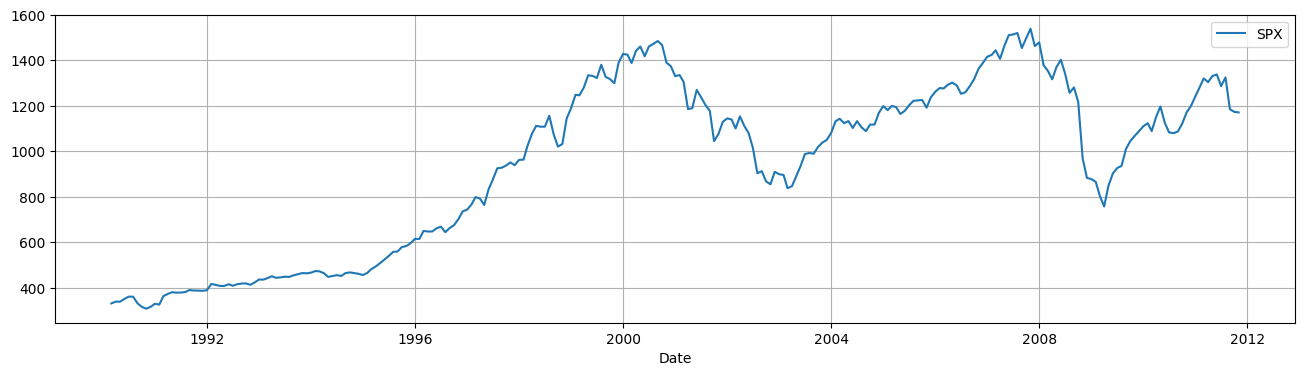

In [38]:
fig = plt.figure(figsize=(16, 4))
sns.lineplot(data=by_month)
plt.grid()
plt.show()

In [39]:
# pd.read_csv() 함수 index_col 파라미터: 컬럼을 인덱스로 설정
spx = pd.read_csv(file_path, parse_dates=['Date'], index_col=['Date'])

In [40]:
spx.head()

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [41]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


# banklist 데이터셋

*   [banklist.csv](https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/banklist.csv)
*   데이터프레임을 생성할 때 날짜/시간(datetime) 타입으로 변환할 수 있는 모든 컬럼들은 날짜/시간 타입으로 변환
*   연도별 파산한 은행 숫자 시각화
*   분기별 파산한 은행 숫자 시각화
*   월별 파산한 은행 숫자 시각화
*   기간별 통계는 Closing Date를 기준으로.